<a href="https://cognitiveclass.ai/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDL0321ENSkillsNetwork951-2022-01-01"><img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DL0321EN-SkillsNetwork/image/IDSN-logo.png" width="400"> </a>

<h1 align=center><font size = 5>Data Preparation</font></h1>


## Objective


In this lab, you will learn how to load images and manipulate them for training using Keras ImageDataGenerator.


## Table of Contents

<div class="alert alert-block alert-info" style="margin-top: 20px">

<font size = 3>    

1. <a href="#item22">Import Libraries and Packages</a>
2. <a href="#item21">Download Data</a>
3. <a href="#item23">Construct an ImageDataGenerator Instance</a>  
4. <a href="#item24">Visualize Batches of Images</a>
5. <a href="#item25">Questions</a>    
</font>
    
</div>


<a id="item1"></a>


<a id='item21'></a>


## Import Libraries and Packages


Before we proceed, let's import the libraries and packages that we will need to complete the rest of this lab.


In [1]:
!pip install skillsnetwork

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 20.6 MB/s eta 0:00:00


In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
import skillsnetwork
import tensorflow
from tensorflow.keras.preprocessing.image import ImageDataGenerator

## Download Data


For your convenience, I have placed the data on a server which you can retrieve and unzip easily using the **skillsnetwork.prepare** command. So let's run the following line of code to get the data. Given the large size of the image dataset, it might take some time depending on your internet speed.


In [4]:
await skillsnetwork.prepare("https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0321EN/data/concrete_data_week2.zip",path = "./", overwrite=True)

  0%|          | 0/80011 [00:00<?, ?it/s]

Saved to '.'


Now, you should see two folders appear in the left pane: *Positive* and *Negative*. *Negative* is the negative class like we defined it earlier and it represents the concrete images with no cracks. *Positive* on the other hand is the positive class and represents the concrete images with cracks.


**Important Note**: There are thousands and thousands of images in each folder, so please don't attempt to double click on the *Negative* and *Positive* folders. This may consume all of your memory and you may end up with a **50*** error. So please **DO NOT DO IT**.


You can check the content of <code>./concrete_data_week2</code> by running the following:


In [5]:
!ls ./concrete_data_week2

Negative  Positive


or the following:


In [ ]:
os.listdir('concrete_data_week2')

<a id='item22'></a>


<a id='item23'></a>


## Construct an ImageDataGenerator Instance


In this section, you will learn how to define a Keras ImageDataGenerator instance and use it to load and manipulate data for building a deep learning model.


Before we proceed, let's define a variable that represents the path to the folder containing our data which is <code>concrete_data_week2</code> in this case.


In [6]:
dataset_dir = './concrete_data_week2'

Keras ImageDataGenerator requires images be arranged in a certain folder hierarchy, where the main directory would contain folders equal to the number of classes in your problem. Since in this case we are trying to build a classifier of two classes, then our main directory, which is <code>concrete_data_week2</code>, should contain two folders, one for each class. This has already been done for you as the negative images are in one folder and the positive images are in another folder.


Let's go ahead and define an instance of the Keras ImageDataGenerator.


#### Standard ImageDataGenerator


You can define a standard one like this, where you are simply using the ImageDataGenerator to train your model in batches.


In [46]:
# instantiate your image data generator
data_generator = ImageDataGenerator()

Next, you use the <code>flow_from_directory</code> methods to loop through the images in batches. In this method, you pass the directory where the images reside, the size of each batch, *batch_size*, and since batches are sampled randomly, then you can also specify a random seed, *seed*, if you would like to reproduce the batch sampling. In case you would like to resize your images, then you can using the *target_size* argument to accomplish that.


In [47]:
image_generator = data_generator.flow_from_directory(
    dataset_dir,
    batch_size=4,
    class_mode='categorical',
    seed=24
    )

Found 40000 images belonging to 2 classes.


What is great about this method, is it prints a summary of it found in the directory passed. Here, it found 40,000 images in total belonging to 2 classes.


Now, to access the batches, you use the <code>next</code> method as follows:


In [48]:
first_batch = next(image_generator)
first_batch

(array([[[[151., 149., 150.],
          [153., 151., 152.],
          [155., 153., 154.],
          ...,
          [153., 149., 148.],
          [153., 149., 148.],
          [153., 149., 148.]],
 
         [[152., 150., 151.],
          [154., 152., 153.],
          [156., 154., 155.],
          ...,
          [154., 150., 149.],
          [154., 150., 149.],
          [154., 150., 149.]],
 
         [[153., 151., 152.],
          [155., 153., 154.],
          [156., 154., 155.],
          ...,
          [156., 152., 151.],
          [156., 152., 151.],
          [156., 152., 151.]],
 
         ...,
 
         [[142., 140., 143.],
          [142., 140., 143.],
          [142., 140., 143.],
          ...,
          [139., 135., 136.],
          [142., 138., 139.],
          [145., 141., 142.]],
 
         [[142., 140., 143.],
          [142., 140., 143.],
          [142., 140., 143.],
          ...,
          [140., 136., 137.],
          [142., 138., 139.],
          [146., 142., 143.

As you can see, this returned the images along with their labels. Therefore, the following returns the images only,


In [49]:
first_batch_images = first_batch[0]
first_batch_images

array([[[[151., 149., 150.],
         [153., 151., 152.],
         [155., 153., 154.],
         ...,
         [153., 149., 148.],
         [153., 149., 148.],
         [153., 149., 148.]],

        [[152., 150., 151.],
         [154., 152., 153.],
         [156., 154., 155.],
         ...,
         [154., 150., 149.],
         [154., 150., 149.],
         [154., 150., 149.]],

        [[153., 151., 152.],
         [155., 153., 154.],
         [156., 154., 155.],
         ...,
         [156., 152., 151.],
         [156., 152., 151.],
         [156., 152., 151.]],

        ...,

        [[142., 140., 143.],
         [142., 140., 143.],
         [142., 140., 143.],
         ...,
         [139., 135., 136.],
         [142., 138., 139.],
         [145., 141., 142.]],

        [[142., 140., 143.],
         [142., 140., 143.],
         [142., 140., 143.],
         ...,
         [140., 136., 137.],
         [142., 138., 139.],
         [146., 142., 143.]],

        [[142., 140., 143.],
       

and the following returns the labels only.


In [50]:
first_batch_labels = first_batch[1]
first_batch_labels

array([[1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.]], dtype=float32)

#### Custom ImageDataGenerator


You can also specify some transforms, like scaling, rotations, and flips, that you would like applied to the images when you define an ImageDataGenerator object. Say you want to normalize your images, then you can define your ImageDataGenerator instance as follows:


In [54]:
# instantiate your image data generator
data_generator = ImageDataGenerator(
    rescale=1./255
)

And then you proceed with defining your *image_generator* using the *flow_from_directory* method, just like before.


In [55]:
image_generator = data_generator.flow_from_directory(
    dataset_dir,
    batch_size=4,
    class_mode='categorical',
    seed=24
    )

Found 40000 images belonging to 2 classes.


However, now we explore the first batch using the *next* method,


In [56]:
first_batch = next(image_generator)
first_batch

(array([[[[0.5921569 , 0.58431375, 0.5882353 ],
          [0.6       , 0.5921569 , 0.59607846],
          [0.60784316, 0.6       , 0.6039216 ],
          ...,
          [0.6       , 0.58431375, 0.5803922 ],
          [0.6       , 0.58431375, 0.5803922 ],
          [0.6       , 0.58431375, 0.5803922 ]],
 
         [[0.59607846, 0.5882353 , 0.5921569 ],
          [0.6039216 , 0.59607846, 0.6       ],
          [0.6117647 , 0.6039216 , 0.60784316],
          ...,
          [0.6039216 , 0.5882353 , 0.58431375],
          [0.6039216 , 0.5882353 , 0.58431375],
          [0.6039216 , 0.5882353 , 0.58431375]],
 
         [[0.6       , 0.5921569 , 0.59607846],
          [0.60784316, 0.6       , 0.6039216 ],
          [0.6117647 , 0.6039216 , 0.60784316],
          ...,
          [0.6117647 , 0.59607846, 0.5921569 ],
          [0.6117647 , 0.59607846, 0.5921569 ],
          [0.6117647 , 0.59607846, 0.5921569 ]],
 
         ...,
 
         [[0.5568628 , 0.54901963, 0.56078434],
          [0.55686

we find that the values are not integer values anymore, but scaled resolution since the original number are divided by 255.


You can learn more about the Keras ImageDataGeneration class [here](https://keras.io/preprocessing/image/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDL0321ENSkillsNetwork951-2022-01-01).


<a id='item24'></a>


## Visualize Batches of Images


Let write some code to visualize a batch. We will use subplots in order to make visualizing the images easier.


Recall that we can access our batch images as follows:

<code>first_batch_images = image_generator.next()[0] # first batch</code>

<code>second_batch_images = image_generator.next()[0] # second batch</code>

and so on.


In [67]:
first_batch_images = first_batch[0]

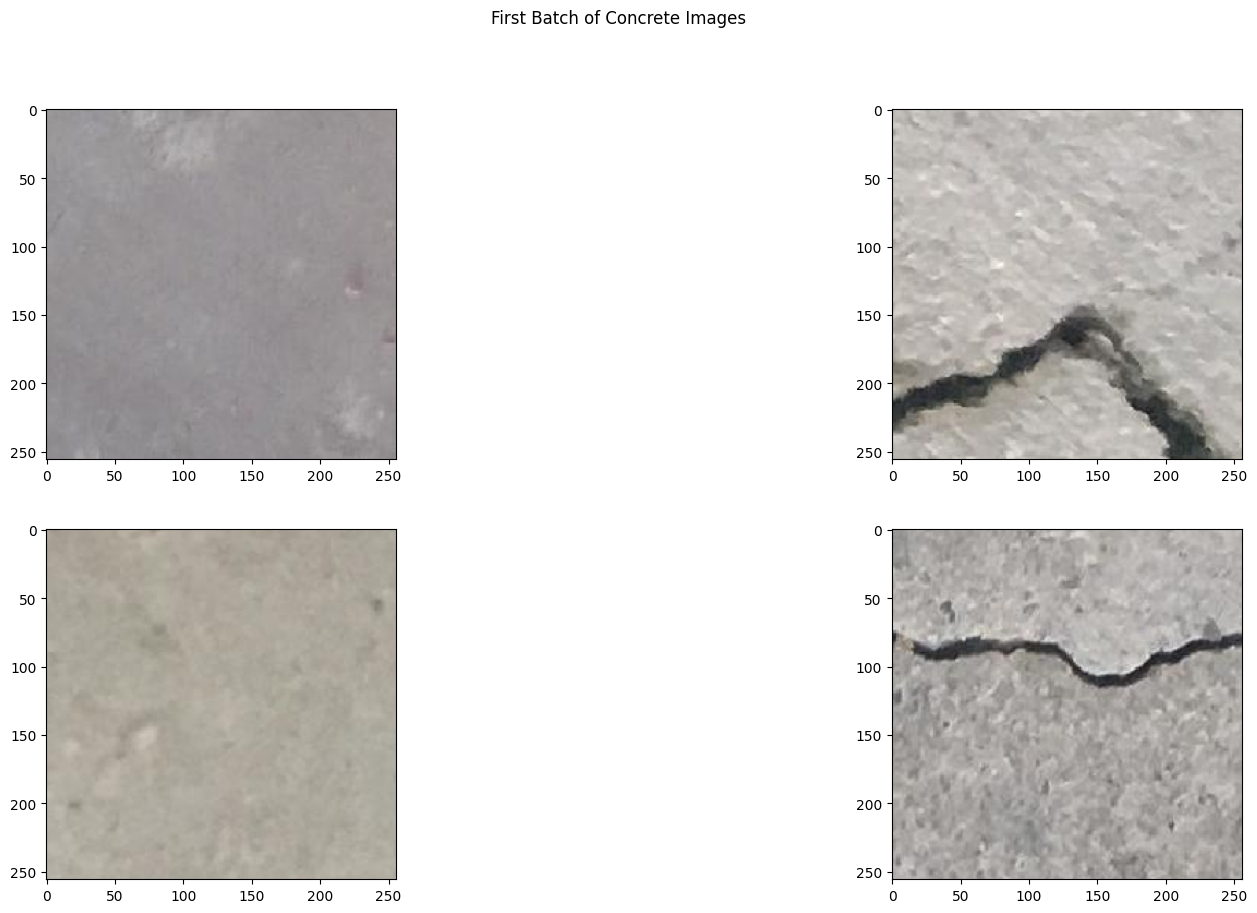

In [69]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20, 10)) # define your figure and axes
ind = 0
for ax1 in axs:
    for ax2 in ax1:
        image_data = first_batch_images[ind]
        ax2.imshow(image_data)
        ind += 1

fig.suptitle('First Batch of Concrete Images')
plt.show()

Remember that batches are sampled randomly from the data. In our first batch, we ended up with two negative image and two positive images.


**Important Note**: Because of a bug with the imshow function in Matplotlib, if you are plotting the unscaled RGB images, you have to cast the **image_data** to uint8 before you call the <code>imshow</code> function. So In the code above It looks like this:

image_data = first_batch_images[ind].astype(np.uint8)


<a id='item25'></a>


## Questions


### Question: Create a plot to visualize the images in the third batch.


In [70]:
## You can use this cell to type your code to answer the above question


second_batch_images = next(image_generator)[0]
third_batch_images = next(image_generator)[0]



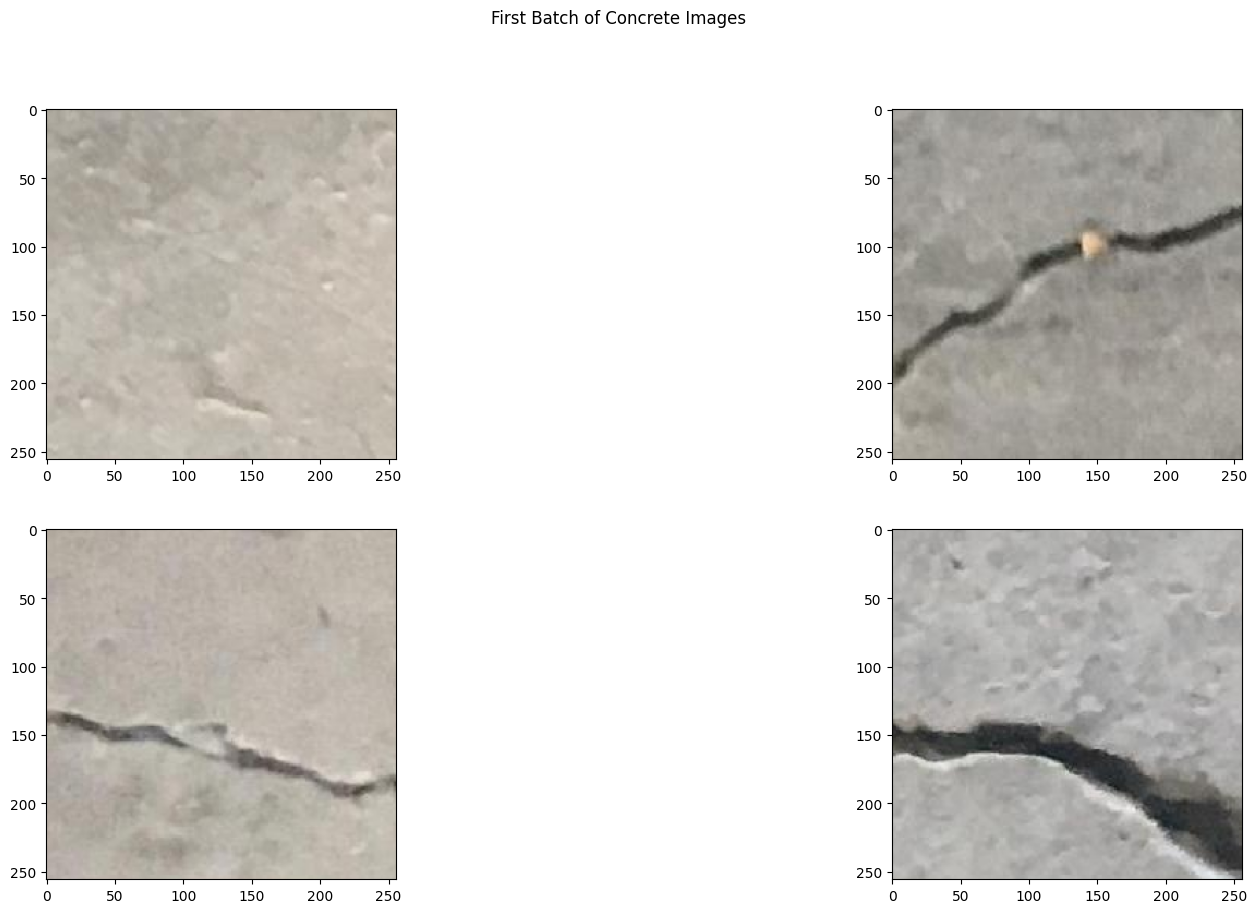

In [71]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20, 10)) # define your figure and axes
ind = 0
for ax1 in axs:
    for ax2 in ax1:
        image_data = third_batch_images[ind]
        ax2.imshow(image_data)
        ind += 1

fig.suptitle('First Batch of Concrete Images')
plt.show()

### Question: How many images from each class are in the fourth batch?


In [72]:
fourth_batch = next(image_generator)

In [73]:
## You can use this cell to type your code to answer the above question
fourth_batch_labels = fourth_batch[1]
fourth_batch_labels

array([[1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

### Question: Create a plot to visualize the second image in the fifth batch.


In [74]:
fifth_batch = next(image_generator)

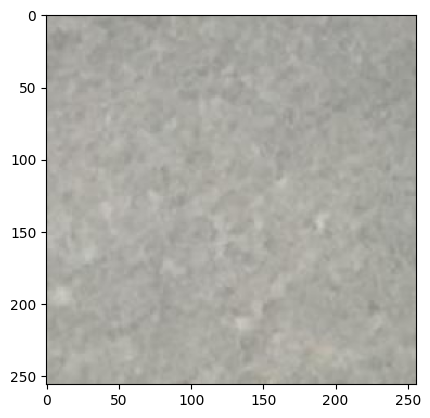

In [75]:
## You can use this cell to type your code to answer the above question
image = fifth_batch[0][1]
plt.imshow(image)



### Question: How many images from each class are in the fifth batch?


In [76]:
## You can use this cell to type your code to answer the above question
fifth_batch[1]



array([[0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.]], dtype=float32)

Make sure to answer the above questions as the quiz in this module is heavily based on them.


### Thank you for completing this lab!

This notebook was created by Alex Aklson. I hope you found this lab interesting and educational.


This notebook is part of a course on **Coursera** called *AI Capstone Project with Deep Learning*. If you accessed this notebook outside the course, you can take this course online by clicking [here](https://cocl.us/DL0321EN_Coursera_Week2_LAB1).



## Change Log

|  Date (YYYY-MM-DD) |  Version | Changed By  |  Change Description |
|---|---|---|---|
| 2020-09-18  | 2.0  | Shubham  |  Migrated Lab to Markdown and added to course repo in GitLab |



<hr>

Copyright &copy; 2020 [IBM Developer Skills Network](https://cognitiveclass.ai/?utm_medium=dswb&utm_source=bducopyrightlink&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDL0321ENSkillsNetwork951-2022-01-01&utm_campaign=bdu). This notebook and its source code are released under the terms of the [MIT License](https://bigdatauniversity.com/mit-license/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDL0321ENSkillsNetwork951-2022-01-01).
